In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [6]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [7]:
df2 = df.drop(['availability','society','balcony','area_type'],axis='columns')

In [8]:
df2

location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique().sum()

'2 BHK4 Bedroom3 BHK4 BHK6 Bedroom3 Bedroom1 BHK1 RK1 Bedroom8 Bedroom2 Bedroom7 Bedroom5 BHK7 BHK6 BHK5 Bedroom11 BHK9 BHK9 Bedroom27 BHK10 Bedroom11 Bedroom10 BHK19 BHK16 BHK43 Bedroom14 BHK8 BHK12 Bedroom13 BHK18 Bedroom'

In [13]:
df3['bhk']= df3['size'].apply(lambda x : int(x.split(" ")[0]))
df3.bhk.unique()

C:\Users\admin\AppData\Local\Temp\ipykernel_12244\803780661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x : int(x.split(" ")[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [16]:
def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqrt_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

### For below row , it shows total_sqft as 3475 which is an average of the range 2100-2850

In [18]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering

### Add new feature called price per square feet

In [19]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [20]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [21]:
df5.to_csv('bhp.csv',index=False)

### Examine location which is a categorical variable.we need to apply dimensionality rediction techiqure here to reduce number of locations

In [22]:
df5.location = df5.location.apply(lambda x:x.strip())

location_status = df5['location'].value_counts(ascending = False)
location_status

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [23]:
location_status.values.sum()

13200

In [24]:
len(location_status[location_status>=10])

254

In [25]:
len(location_status)

1287

In [26]:
len(location_status[location_status<=10])

1047

### Dimensionality Reduction

### Any location having less than 10 data points should be tagged as "Other" location. This way number of categories an be reduce by huge number amount .Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [27]:
location_stats_less_than_10 = location_status[location_status<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [28]:
len(df5.location.unique())

1287

In [29]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [30]:
len(df5.location.unique())

241

In [31]:
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

## Outlier Removal usingBusiness Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom in 300 (i.e. 2bhk apartment is minimum 600 sqft.if you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier we will remove such outilers by keeping our minimum thresold per bhk to be 300 sqft

In [32]:
df5[df5.total_sqft/df5.bhk<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

Check above data points.we have 6 bhk apartment with 1020 sqft.Another one is 8 bhk and total sqft is 600. These are clear data errors thats can be removed safely

In [33]:
df5.shape

(13200, 7)

In [34]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

## Outailer Removal Using Standard Deviation and Mean 

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft where as Max is 12000000, this shows a wide variation in property prices.we should remove outliers per locaion using mean and one standard deciation

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10242, 7)

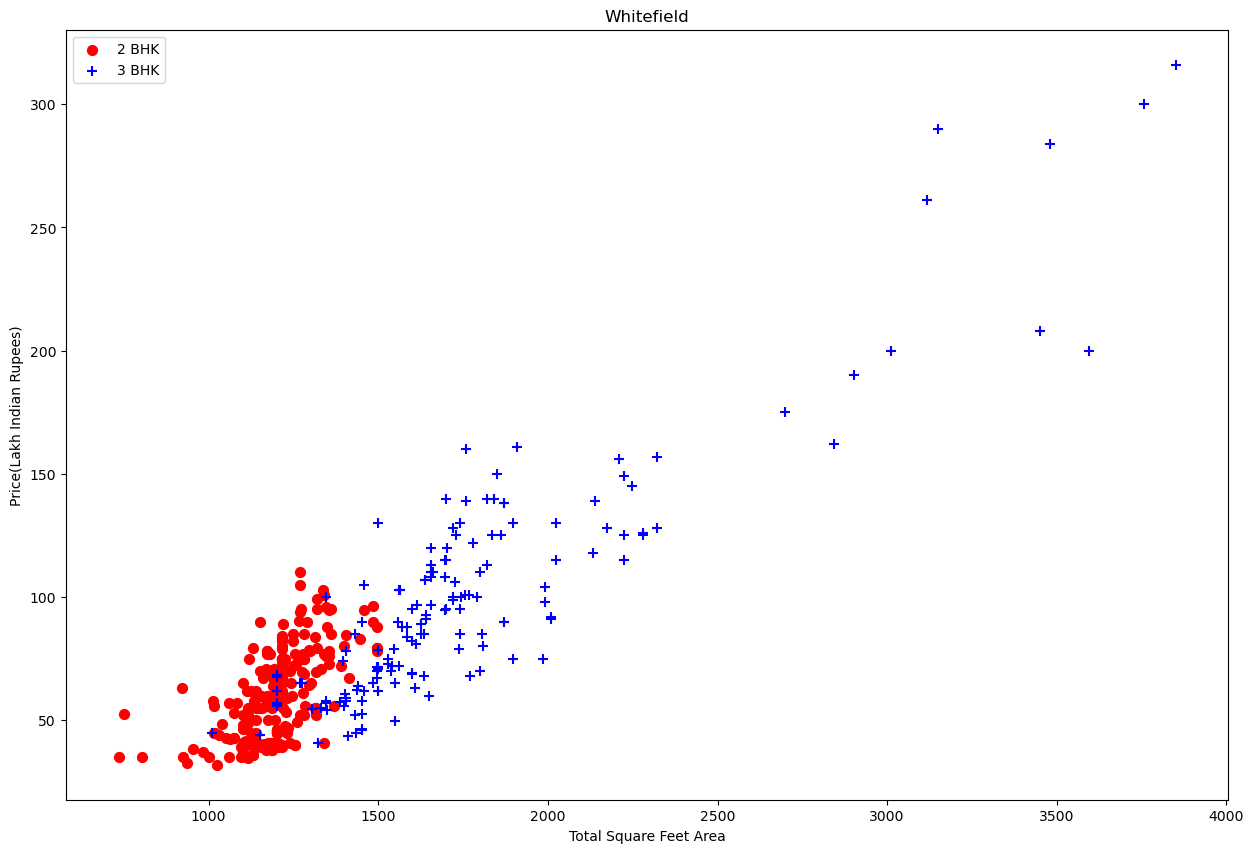

In [45]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk ==2)]
    bhk3 = df[(df.location==location) & (df.bhk ==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color= 'red', label = '2 BHK',s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color = 'blue',marker='+',label = '3 BHK',s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price(Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,'Whitefield')

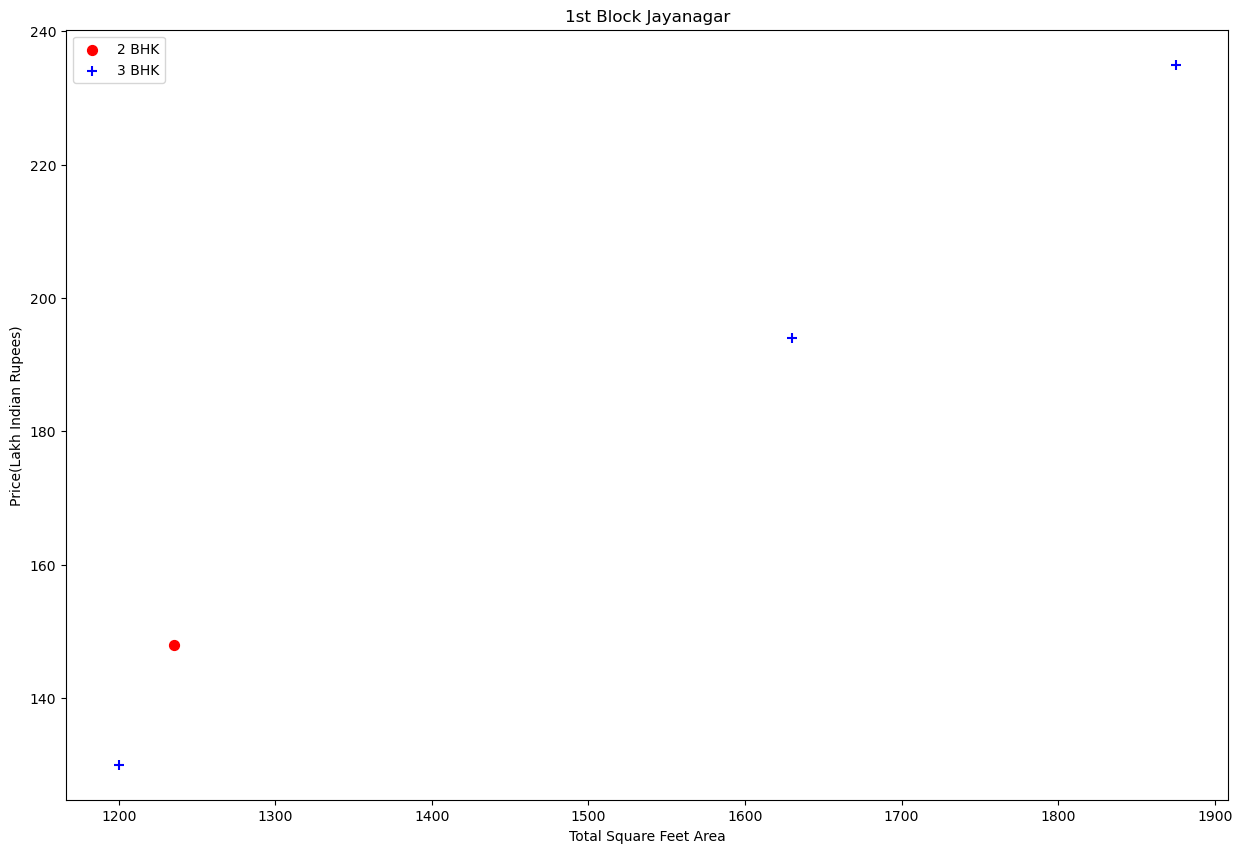

In [48]:
plot_scatter_chart(df7,'1st Block Jayanagar')

## We should also remove properties where for same location the price (for example) 3 beadroom apartment is less than 2 beadroom apartment (with same square ft area).What we will do is for a given location, we will built a dictionary of stats per bhk, i.e.

    {
        '1' :{
            'mean': 4000,
            'std' : 2000,
            'count': 34
        },
        '2':{
            'mean': 4300,
            'std' : 2300,
            'count':22
        },
    }
    
    
### Now we can remove those 2 BHK apartments whose price_per_sqt is less than mean price_per_sqft of 1 BHK apartment